# Molecular Dynamics LAMMPS ReaxFF Tutorial

## What is LAMMPS?
Large-scale Atomic/Molecular MAssively Parrallel Simulatior (LAMMPS) is a classical molecular dynamics program developed by Sandia National Labs.

## What is ReaxFF?
ReaxFF is a reactive forcefield for moelcular dynamics. Traditional classical forcefields are unable to model chemical reactions due to need to form and break bonds. In a traditional forcefield, all bonds have to be defined explicitly before the start of the simulation. With ReaxFF however, bond orders are used to calculate when bonds are forming and breaking. ReaxFF also aims to be a as general as possible, making it a very complex forcefield with many system dependent parameters.

## The Model
Today, you will be using LAMMPS to model the thermal decomposition of RDX and HMX. Over the course of this tutorial, you will be watch the difference of heating RDX with a reactive forcefield (ReaxFF) and a tradtional forcefield (GAFF2) to view the differing behavior between them.

## What you Will Need
1. Access to the CRC clusters
2. VMD with the Topo Tools plugin (this normally comes with the current VMD installer)
3. Access to a text editor to make the input files
4. All files provided with this tutorial

## LAMMPS Input Files
For most LAMMPS jobs, only a few files are needed. The in. files that runs commands, and where things such as temperature range, pressure range, bond definitions, ect. The data. file is LAMMPS version of the structure file. Other than that all that is needed is a .slurm file to submit the job to the cluster. In this tutorial, we will develop the in. file and the data. file.

### The data. file:
Using the .pdb file provided, we will use VMD and Topo Tools to generate the .data file for LAMMPS.
1. Open VMD
2. On the VMD Main Window, click File --> New Molecule
3. On the window that opens, first click Browse and find the .pdb file. The file type should automatically be determined. Click Load
4. If you've done this correctly, you should be able to see the molecule made of lines in the Display window
5. Go to the command window that opens with the program, and type "topo" onto the first line
6. Next, type topo writelammpsdata RDX.data charge

This should generate a file titled RDX.data with the atom type "charge," which allows the simulation to calculate bonding. For the GAFF2 simulation, you will do this same process, but replace the "charge" with "full" which includse the charges in the atoms, and bonds must be defined explicitly.

NOTE: Open your RDX.data file in a text editor and change the lines 12, 13, and 14 to 0.0 50.0 or atoms may be lost in the simulation as seen below:

### The in. file
1. Open a blank .txt file, and rename it to in.reax.rdx
2. Copy down the following, I will explain each line

The first two lines titles and formatting for the file. The next is units, we want real units for this simulation for simplicity. For an example of how this command affects the units, please see: https://lammps.sandia.gov/doc/units.html

The next line simply reads your data. file. before running your jpb, make sure your data. file has the same name as on this line. The next two lines are loading the forcefield and parameter files. These files are specific to this system, so they are provided. The next two lines define the nearest neighborts, when the simulation should check if atoms are neighbors, and the distance cutoff that defines a "neighbor." The next set of lines is equilibrating the iniitial energy and pressure of the system using more parameter files specific to this system. We are equilibrating the structure at a very low temperature, where we know the strcture will be in tact. After this, we unfix all these definitions and redifine them. The second set of "fix" lines is the heating simulation, heating from the temperature we equilibrated the system at to a very high temperature well above the point of thermal decomposition. We then define the timestep, and the data that is tracked and in what intervals in the thermo_style and thermo commands. The dump command on the other hand tracks the positions and trajectories of each atom each step and saves the frames at each number of steps as we define. This will be how you view the movie of the molecule exploding.

### The .slurm file
The final file is how you submit to the crc. I have posted an example file below.

Any other files you need to run this simulation have been provided for you with the tutorial.

## Viewing the Movie
To watch the molecule explode, follow these steps:
1. Open VMD again
2. On the VMD Main Window, click File --> New Molecule
3. On the window that opens, first click Browse and find the .pdb file. The file type will need to be found manually, so scroll down until you find "LAMMPS Trajectory" then click Load
4. The molecule should be in the Display window now, but we want to see it better, so click Graphics --> Representations
5. On this screen, one representation should already be loaded. In the drawing method drop box, find VDW, and change the sphere size to your liking, and increase the resolution to ~70
6. Then click "Create Rep"
7. In the new Representation, go to drawing method and click "Dynamic Bonds" change the distance cutoff so it is reasonable, and change the bond radius as you like. Increase the resolution to ~70 again
8. On the main window, you should be able to fast forward and rewind the simulation using the scroll bar at the bottom, as well as speed up and slow down the simulation

During the movie, you should see the RDX molecule explode

## The Traditional Forcefield Simulation
We already discussed how to create the data. file for this simulation. As for the in. file, it is provided below. Traditional forcefields like GAFF2 require the user to atom type each specific pair, bonds, and ect, which is beyond the scope of this tutorial. You can repeat the steps above with these new files, and should see that the molecule does not react the same under the traditional forecfield rather than ReaxFF. Other issues, such as bonds being incorrect and the structure looking odd at the start of the simulation us also a commnon side effect of using the incorrect type of forcefield.

The major differences between this input file and the previous one is the bond definitions, next to the pair_coeff tags. We are also now using atom style full rather than the charge style needed to model the bonds breaking and forming. We also remove the parameter dependent potions of the NVT and NVE equilibrations.

## Data Analysis
Below is a Python script to read LAMMPS log output file. The script reads the file, and grabs all the thermodynamic quantities we tracked during the simulation, then transforming them into arrays. From there, you can plot the data to see the point at which the RDX explodes. Let's compare the Potenetial Energy vs Temperature plots for both the reactive and non-reactive forcefields.

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


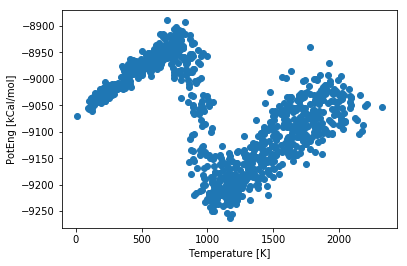

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ReaxFF = pd.read_csv("reax/log.lammps",delim_whitespace = True,skiprows=108,skipfooter=30,names=["Step","PotEng","KinEng","TotEng","Temp","Volume","Press"])
GAFF = pd.read_csv("GAFF/log.lammps",delim_whitespace = True,skiprows=108,skipfooter=30,names=["Step","PotEng","KinEng","TotEng","Temp","Volume","Press"])

ReaxT = np.array(ReaxFF["Temp"])
ReaxP = np.array(ReaxFF["PotEng"])
GAFFT = np.array(GAFF["Temp"])
GAFFP = np.array(GAFF["PotEng"])

plt.scatter(ReaxT,ReaxP);
plt.xlabel("Temperature [K]");
plt.ylabel("PotEng [kCal/mol]");

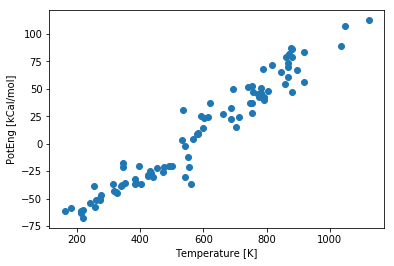

In [3]:
plt.scatter(GAFFT,GAFFP);
plt.xlabel("Temperature [K]");
plt.ylabel("PotEng [kCal/mol]");